# Stefan's filtering

In [1]:
import os
import pandas as pd
import scanpy as sc
import anndata as ad

//anaconda3/envs/robin_simulations/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
//anaconda3/envs/robin_simulations/lib/python3.7/site-packages/dask/config.py:161: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


## Reading in data from scratch (can skip if you have loom files)

In [10]:
from scipy import io as io
#data_path = os.path.join('D:Robin','Single_seq_data','OB_single_seq_data')
data_path = '../../OB_single_seq_data'
input_path = os.path.join(data_path,'Replicate_1','filtered_feature_bc_matrix')
r1 = pd.DataFrame(
    io.mmread(os.path.join(input_path,'matrix.mtx')).T.todense(),
    columns = pd.read_csv(os.path.join(input_path, 'features.tsv'), header=None, sep='\t')[1],
    index = pd.read_csv(os.path.join(input_path, 'barcodes.tsv'), header=None)[0]
)

input_path = os.path.join(data_path,'Replicate_2','filtered_feature_bc_matrix')
r2 = pd.DataFrame(
    io.mmread(os.path.join(input_path,'matrix.mtx')).T.todense(),
    columns = pd.read_csv(os.path.join(input_path, 'features.tsv'), header=None, sep='\t')[1],
    index = pd.read_csv(os.path.join(input_path, 'barcodes.tsv'), header=None)[0]
)

input_path = os.path.join(data_path,'Replicate_3','filtered_feature_bc_matrix')
r3 = pd.DataFrame(
    io.mmread(os.path.join(input_path,'matrix.mtx')).T.todense(),
    columns = pd.read_csv(os.path.join(input_path, 'features.tsv'), header=None, sep='\t')[1],
    index = pd.read_csv(os.path.join(input_path, 'barcodes.tsv'), header=None)[0]
)

In [11]:
full_data = pd.concat([r1,r2,r3])

In [12]:
full_data

1                   Xkr4  Gm1992  Gm37381  Rp1  Sox17  Gm37323  Mrpl15  \
0                                                                        
AAACCCAAGAAGGATG-1     0       0        0    0      0        0       0   
AAACCCAAGGTTGTTC-1     5       0        0    0      0        0       0   
AAACCCAAGTCCCGGT-1     0       0        0    0      0        0       0   
AAACCCACACATCATG-1     0       0        0    0      0        0       1   
AAACCCACACCAGGTC-1     0       0        0    0      0        0       0   
...                  ...     ...      ...  ...    ...      ...     ...   
TTTGTTGAGGCCTGAA-1    37       2        0    0      0        0       1   
TTTGTTGCACTCTCGT-1     0       0        0    0      0        0       0   
TTTGTTGCATCGGATT-1     0       0        0    0      0        0       0   
TTTGTTGGTACATTGC-1     0       0        0    0      0        0       0   
TTTGTTGTCTCATTGT-1    14       0        0    1      0        0       0   

1                   Lypla1  Gm37988  Tcea1  ...  AC125149.4  AC234645.1  \
0                                           ...                           
AAACCCAAGAAGGATG-1       0        0      0  ...           0           0   
AAACCCAAGGTTGTTC-1       0        0      0  ...           0           0   
AAACCCAAGTCCCGGT-1       0        0      0  ...           0           0   
AAACCCACACATCATG-1       0        1      0  ...           0           0   
AAACCCACACCAGGTC-1       0        0      0  ...           0           0   
...                    ...      ...    ...  ...         ...         ...   
TTTGTTGAGGCCTGAA-1       0        0      0  ...           0           0   
TTTGTTGCACTCTCGT-1       0        0      0  ...           0           0   
TTTGTTGCATCGGATT-1       0        0      0  ...           0           0   
TTTGTTGGTACATTGC-1       0        0      0  ...           0           0   
TTTGTTGTCTCATTGT-1       0        0      1  ...           0           0   

1                   AC168977.2  AC168977.1  AC149090.1  CAAA01118383.1  \
0                                                                        
AAACCCAAGAAGGATG-1           0           0           0               0   
AAACCCAAGGTTGTTC-1           0           0           2               0   
AAACCCAAGTCCCGGT-1           0           0           0               0   
AAACCCACACATCATG-1           0           0           3               0   
AAACCCACACCAGGTC-1           0           0           5               0   
...                        ...         ...         ...             ...   
TTTGTTGAGGCCTGAA-1           0           0           5               0   
TTTGTTGCACTCTCGT-1           0           0           0               0   
TTTGTTGCATCGGATT-1           0           0           0               2   
TTTGTTGGTACATTGC-1           0           0           1               0   
TTTGTTGTCTCATTGT-1           0           0          11               2   

1                   Vmn2r122  CAAA01147332.1  eGFP  tdtomato  
0                                                             
AAACCCAAGAAGGATG-1         0               0     1         0  
AAACCCAAGGTTGTTC-1         0               0     0         0  
AAACCCAAGTCCCGGT-1         0               0     0         0  
AAACCCACACATCATG-1         0               0     0         0  
AAACCCACACCAGGTC-1         0               0     0         0  
...                      ...             ...   ...       ...  
TTTGTTGAGGCCTGAA-1         0               0     1         0  
TTTGTTGCACTCTCGT-1         0               0     0         0  
TTTGTTGCATCGGATT-1         0               0     0         0  
TTTGTTGGTACATTGC-1         0               0     0         0  
TTTGTTGTCTCATTGT-1         0               0     1         0  

[44423 rows x 31055 columns]

In [13]:
#input_path = os.path.join('D:Robin','Single_seq_data','OB_single_seq_data','asl319.meta.data.table.txt')
#meta_data = pd.read_table(input_path,sep = '\t').set_index('cellID')
#input_path = os.path.join('D:Robin','Single_seq_data','asl319.meta.data.table.txt')
input_path = os.path.join(data_path,'asl319.meta.data.txt')
meta_data = pd.read_table(input_path,
                          #have to set names manually (copied from first name of text file) because not every row has all columns so it was giving errors
                          #names=["cellID","sample_group","orig_ident","nCount_RNA","nFeature_RNA","sampleID","percent_mt","included","nCount_SCT","nFeature_SCT","all","integrated_snn_res_0_3","seurat_clusters","DF_Classification","DF_pANN","PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12","PC13","PC14","PC15","PC16","PC17","PC18","PC19","PC20","UMAP_1","UMAP_2","tSNE_1","tSNE_2","cellIdent","hmIdent2","hmIdent","clustIdent","uniquecellID","sample_id","sample_group_colors","sampleID_colors","UMAP_1_SubC_Ext","UMAP_2_SubC_Ext","row_names"],
                          #skiprows=0, #to skip actual header row since I set names manually
                          #index_col=0
                         ).set_index('cellID')

In [14]:
meta_data

orig.ident  nCount_RNA  nFeature_RNA sampleID  percent.mt  \
cellID                                                                         
AAACCCAAGAAGGATG_1         R1        2059          1061       R1    0.097135   
AAACCCAAGGTTGTTC_1         R1        5103          1881       R1    0.097982   
AAACCCACACATCATG_1         R1       10705          3191       R1    0.177487   
AAACCCACACCAGGTC_1         R1        7480          2310       R1    0.093583   
AAACCCACAGCCTTCT_1         R1       14167          3428       R1    0.049411   
...                       ...         ...           ...      ...         ...   
TTTGGTTTCCGACGGT_3         R3       16650          3755       R3    0.060060   
TTTGTTGAGCGTATGG_3         R3        4215          1632       R3    0.118624   
TTTGTTGAGGCCTGAA_3         R3       16237          3858       R3    0.000000   
TTTGTTGCATCGGATT_3         R3        4513          1753       R3    0.221582   
TTTGTTGTCTCATTGT_3         R3       26195          5023       R3    0.053445   

                   included  nCount_SCT  nFeature_SCT  all DF_Classification  \
cellID                                                                         
AAACCCAAGAAGGATG_1        +        5850          1516  all           Singlet   
AAACCCAAGGTTGTTC_1        +        7243          1881  all           Singlet   
AAACCCACACATCATG_1        +        8750          3191  all           Singlet   
AAACCCACACCAGGTC_1        +        7679          2310  all           Singlet   
AAACCCACAGCCTTCT_1        +        8726          3324  all           Singlet   
...                     ...         ...           ...  ...               ...   
TTTGGTTTCCGACGGT_3        +       11289          3718  all           Singlet   
TTTGTTGAGCGTATGG_3        +        9289          1841  all           Singlet   
TTTGTTGAGGCCTGAA_3        +       11257          3828  all           Singlet   
TTTGTTGCATCGGATT_3        +        9399          1866  all           Singlet   
TTTGTTGTCTCATTGT_3        +       11346          4008  all           Doublet   

                    ...         subclustering  sub_clusters_ExNeurons  \
cellID              ...                                                 
AAACCCAAGAAGGATG_1  ...                  Rest                     NaN   
AAACCCAAGGTTGTTC_1  ...                  Rest                     NaN   
AAACCCACACATCATG_1  ...                  Rest                     NaN   
AAACCCACACCAGGTC_1  ...                  Rest                     NaN   
AAACCCACAGCCTTCT_1  ...                  Rest                     NaN   
...                 ...                   ...                     ...   
TTTGGTTTCCGACGGT_3  ...                  Rest                     NaN   
TTTGTTGAGCGTATGG_3  ...                  Rest                     NaN   
TTTGTTGAGGCCTGAA_3  ...  Subcluster Selection                     0.0   
TTTGTTGCATCGGATT_3  ...                  Rest                     NaN   
TTTGTTGTCTCATTGT_3  ...  Subcluster Selection                     6.0   

                          sub_clusters_ExNeurons_names  \
cellID                                                   
AAACCCAAGAAGGATG_1                                 NaN   
AAACCCAAGGTTGTTC_1                                 NaN   
AAACCCACACATCATG_1                                 NaN   
AAACCCACACCAGGTC_1                                 NaN   
AAACCCACAGCCTTCT_1                                 NaN   
...                                                ...   
TTTGGTTTCCGACGGT_3                                 NaN   
TTTGTTGAGCGTATGG_3                                 NaN   
TTTGTTGAGGCCTGAA_3  sub_clusters_ExNeurons_1_Cluster_0   
TTTGTTGCATCGGATT_3                                 NaN   
TTTGTTGTCTCATTGT_3  sub_clusters_ExNeurons_1_Cluster_6   

                    UMAP_1_sub_clusters_ExNeurons  \
cellID                                              
AAACCCAAGAAGGATG_1                            NaN   
AAACCCAAGGTTGTTC_1                            NaN   
AAACCCACACATCATG_1  

In [15]:
#stripping both
full_strip = [cell[0:16] for cell in full_data.index]
Stefan_strip = [cell[0:16] for cell in meta_data.index]

#adding my own -1 and -2 to make indices unique
full_unique = []
for index in full_strip:
    if index+'-1' in full_unique:
        full_unique.append(index+'-2') #already in list
    else:
        full_unique.append(index+'-1')

stefan_unique = []
for index in Stefan_strip:
    if index+'-1' in stefan_unique:
        stefan_unique.append(index+'-2') #already in list
    else:
        stefan_unique.append(index+'-1')

In [16]:
#check that every index lines up
[index for index in stefan_unique if index not in full_unique]

[]

In [17]:
#actually set those unique indices
full_data.index = full_unique
meta_data.index = stefan_unique

### All cells included in his analysis

In [18]:
filtered_data = full_data.loc[[cell for cell in meta_data.index if meta_data.loc[cell,'included'] is "+"]]

In [19]:
filtered_meta = meta_data.loc[filtered_data.index]

In [20]:
filtered_meta

orig.ident  nCount_RNA  nFeature_RNA sampleID  percent.mt  \
AAACCCAAGAAGGATG-1         R1        2059          1061       R1    0.097135   
AAACCCAAGGTTGTTC-1         R1        5103          1881       R1    0.097982   
AAACCCACACATCATG-1         R1       10705          3191       R1    0.177487   
AAACCCACACCAGGTC-1         R1        7480          2310       R1    0.093583   
AAACCCACAGCCTTCT-1         R1       14167          3428       R1    0.049411   
...                       ...         ...           ...      ...         ...   
TTTGGTTTCCGACGGT-1         R3       16650          3755       R3    0.060060   
TTTGTTGAGCGTATGG-1         R3        4215          1632       R3    0.118624   
TTTGTTGAGGCCTGAA-1         R3       16237          3858       R3    0.000000   
TTTGTTGCATCGGATT-1         R3        4513          1753       R3    0.221582   
TTTGTTGTCTCATTGT-1         R3       26195          5023       R3    0.053445   

                   included  nCount_SCT  nFeature_SCT  all DF_Classification  \
AAACCCAAGAAGGATG-1        +        5850          1516  all           Singlet   
AAACCCAAGGTTGTTC-1        +        7243          1881  all           Singlet   
AAACCCACACATCATG-1        +        8750          3191  all           Singlet   
AAACCCACACCAGGTC-1        +        7679          2310  all           Singlet   
AAACCCACAGCCTTCT-1        +        8726          3324  all           Singlet   
...                     ...         ...           ...  ...               ...   
TTTGGTTTCCGACGGT-1        +       11289          3718  all           Singlet   
TTTGTTGAGCGTATGG-1        +        9289          1841  all           Singlet   
TTTGTTGAGGCCTGAA-1        +       11257          3828  all           Singlet   
TTTGTTGCATCGGATT-1        +        9399          1866  all           Singlet   
TTTGTTGTCTCATTGT-1        +       11346          4008  all           Doublet   

                    ...         subclustering  sub_clusters_ExNeurons  \
AAACCCAAGAAGGATG-1  ...                  Rest                     NaN   
AAACCCAAGGTTGTTC-1  ...                  Rest                     NaN   
AAACCCACACATCATG-1  ...                  Rest                     NaN   
AAACCCACACCAGGTC-1  ...                  Rest                     NaN   
AAACCCACAGCCTTCT-1  ...                  Rest                     NaN   
...                 ...                   ...                     ...   
TTTGGTTTCCGACGGT-1  ...                  Rest                     NaN   
TTTGTTGAGCGTATGG-1  ...                  Rest                     NaN   
TTTGTTGAGGCCTGAA-1  ...  Subcluster Selection                     0.0   
TTTGTTGCATCGGATT-1  ...                  Rest                     NaN   
TTTGTTGTCTCATTGT-1  ...  Subcluster Selection                     6.0   

                          sub_clusters_ExNeurons_names  \
AAACCCAAGAAGGATG-1                                 NaN   
AAACCCAAGGTTGTTC-1                                 NaN   
AAACCCACACATCATG-1                                 NaN   
AAACCCACACCAGGTC-1                                 NaN   
AAACCCACAGCCTTCT-1                                 NaN   
...                                                ...   
TTTGGTTTCCGACGGT-1                                 NaN   
TTTGTTGAGCGTATGG-1                                 NaN   
TTTGTTGAGGCCTGAA-1  sub_clusters_ExNeurons_1_Cluster_0   
TTTGTTGCATCGGATT-1                                 NaN   
TTTGTTGTCTCATTGT-1  sub_clusters_ExNeurons_1_Cluster_6   

                    UMAP_1_sub_clusters_ExNeurons  \
AAACCCAAGAAGGATG-1                            NaN   
AAACCCAAGGTTGTTC-1                            NaN   
AAACCCACACATCATG-1                            NaN   
AAACCCACACCAGGTC-1                            NaN   
AAACCCACAGCCTTCT-1                            NaN   
...                                           ...   
TTTGGTTTCCGACGGT-1                            NaN   
TTTGTTGAGCGTATGG-1                            NaN   
TTTGTTGAGGCCTGAA-1                      -0.805

#### setting up AnnData for scanpy

In [21]:
data = sc.AnnData(filtered_data)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [22]:
for column in filtered_meta.columns:
    data.obs[column] = filtered_meta[column]

In [23]:
data.obs['louvain'] = data.obs['clustIdent'] # you can replace these numbers with labels later

In [24]:
data.obs.columns

Index(['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sampleID', 'percent.mt',
       'included', 'nCount_SCT', 'nFeature_SCT', 'all', 'DF_Classification',
       'DF_pANN', 'PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7',
       'PC_8', 'PC_9', 'PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15',
       'PC_16', 'PC_17', 'PC_18', 'PC_19', 'PC_20', 'UMAP_1', 'UMAP_2',
       'tSNE_1', 'tSNE_2', 'cellIdent', 'hmIdent2', 'hmIdent', 'clustIdent',
       'subclustering', 'sub_clusters_ExNeurons',
       'sub_clusters_ExNeurons_names', 'UMAP_1_sub_clusters_ExNeurons',
       'UMAP_2_sub_clusters_ExNeurons', 'sub_subclustering',
       'sub_sub_clusters_ExNeurons', 'sub_sub_clusters_ExNeurons_names',
       'UMAP_1_sub_sub_clusters_ExNeurons',
       'UMAP_2_sub_sub_clusters_ExNeurons', 'louvain'],
      dtype='object')

In [25]:
#getting UMAP coordinates as touples
data.obsm['X_umap'] = data.obs.loc[:,['UMAP_1','UMAP_2']].values

In [26]:
data.obsm['X_umap']

array([[ -0.76893388,   1.08561112],
       [  7.08946014,  -8.62224695],
       [  3.40761271,   1.5803745 ],
       ...,
       [ -6.83425844,   7.13748562],
       [  3.3391743 ,  -4.05854913],
       [-10.5104616 ,  -6.99962054]])

In [ ]:
fname = '../../OB_single_seq_data/final_nuclei/full.loom'
#data.write(fname,compression='gzip')
data.write_loom(fname,write_obsm_varm=True)

In [ ]:
fname = '../../OB_single_seq_data/final_nuclei/full_tables/st_table.p'
data.obs.to_pickle(fname)

fname = '../../OB_single_seq_data/final_nuclei/full_tables/st_data.p'
df = pd.DataFrame(data.X,index=data.obs.index, columns = data.var.index)
df.to_pickle(fname)

### Only projection neurons (only cells included in his subclustering)

In [ ]:
meta_data.sub_clusters_ExNeurons.notnull()

In [13]:
filtered_data = full_data.loc[[cell for cell in meta_data.index if meta_data.sub_clusters_ExNeurons.notnull()[cell]]]

In [14]:
len(filtered_data.index)

7504

In [15]:
filtered_meta = meta_data.loc[filtered_data.index]

In [18]:
set(filtered_meta['subclustering']) #confirmation of filtering (should only say 'Subcluster Selection')

{'Subcluster Selection'}

#### setting up AnnData for scanpy

In [19]:
data = sc.AnnData(filtered_data)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [20]:
for column in filtered_meta.columns:
    data.obs[column] = filtered_meta[column]

In [25]:
data.obs['louvain'] = [str(int(x)) for x in data.obs['sub_clusters_ExNeurons']]

In [ ]:
data.obs.columns

In [27]:
#getting UMAP coordinates as touples
data.obsm['X_umap'] = data.obs.loc[:,['UMAP_1_sub_clusters_ExNeurons','UMAP_2_sub_clusters_ExNeurons']].values

In [ ]:
data.obsm['X_umap']

In [ ]:
fname = '../../OB_single_seq_data/final_nuclei/subcluster.loom'
#data.write(fname,compression='gzip')
data.write_loom(fname,write_obsm_varm=True)

##### save in tables

In [47]:
R1_ids = [cell for cell in data.obs.index if data.obs.loc[cell,'sampleID'] == 'R1']
M_ids = [cell for cell in data.obs.index if data.obs.loc[cell,'louvain'] in ['M1','M2','M3']]

In [48]:
data = data[M_ids]

In [11]:
folder = '../../OB_single_seq_data/final_nuclei/subcluster_tables'

df = pd.DataFrame(data.X,index = data.obs.index, columns = data.var.index)
fname = os.path.join(folder,'st_data.p')
df.to_pickle(fname)

fname = os.path.join(folder,'st_table.p')
data.obs.to_pickle(fname)

In [10]:
data.obs.head()

DF_Classification   DF_pANN       PC_1     PC_10     PC_11  \
AAACGAAGTAGCGTCC-1           Singlet  0.226078 -21.535340  0.352337 -0.763137   
AAACGCTTCCCATAAG-1           Singlet  0.212934 -22.208629 -0.255487  0.649482   
AAACGCTTCTACCCAC-1           Singlet  0.341746 -12.585664  0.154644 -0.637405   
AAAGAACCATCTGTTT-1           Singlet  0.200053 -23.915580  0.022831 -0.319981   
AAAGGATAGCACCGTC-1           Singlet  0.209516 -25.753861  0.048445 -1.052839   

                       PC_12      PC_13      PC_14     PC_15     PC_16  ...  \
AAACGAAGTAGCGTCC-1  0.227845   1.892153  -0.679862  2.614649  0.468919  ...   
AAACGCTTCCCATAAG-1  0.521451   0.598330  -0.178112 -0.941655  1.050998  ...   
AAACGCTTCTACCCAC-1 -2.442243  22.489302 -23.818629  2.167896  1.806053  ...   
AAAGAACCATCTGTTT-1  0.244901   0.591070  -0.051060  0.340743  0.702117  ...   
AAAGGATAGCACCGTC-1  0.741480   1.343677   0.063245  0.344744  1.726144  ...   

                    percent.mt  sampleID  sub_clusters_ExNeurons  \
AAACGAAGTAGCGTCC-1    0.091066        R1                     0.0   
AAACGCTTCCCATAAG-1    0.034831        R1                     0.0   
AAACGCTTCTACCCAC-1    0.042197        R1                     6.0   
AAAGAACCATCTGTTT-1    0.008955        R1                     0.0   
AAAGGATAGCACCGTC-1    0.016992        R1                     0.0   

                          sub_clusters_ExNeurons_names  \
AAACGAAGTAGCGTCC-1  sub_clusters_ExNeurons_1_Cluster_0   
AAACGCTTCCCATAAG-1  sub_clusters_ExNeurons_1_Cluster_0   
AAACGCTTCTACCCAC-1  sub_clusters_ExNeurons_1_Cluster_6   
AAAGAACCATCTGTTT-1  sub_clusters_ExNeurons_1_Cluster_0   
AAAGGATAGCACCGTC-1  sub_clusters_ExNeurons_1_Cluster_0   

                    sub_sub_clusters_ExNeurons  \
AAACGAAGTAGCGTCC-1                         NaN   
AAACGCTTCCCATAAG-1                         NaN   
AAACGCTTCTACCCAC-1                         NaN   
AAAGAACCATCTGTTT-1                         NaN   
AAAGGATAGCACCGTC-1                         NaN   

                    sub_sub_clusters_ExNeurons_names  sub_subclustering  \
AAACGAAGTAGCGTCC-1                               nan                nan   
AAACGCTTCCCATAAG-1                               nan                nan   
AAACGCTTCTACCCAC-1                               nan                nan   
AAAGAACCATCTGTTT-1                               nan                nan   
AAAGGATAGCACCGTC-1                               nan                nan   

                           subclustering     tSNE_1     tSNE_2  
AAACGAAGTAGCGTCC-1  Subcluster Selection  17.437543  23.797655  
AAACGCTTCCCATAAG-1  Subcluster Selection  33.614630  17.665234  
AAACGCTTCTACCCAC-1  Subcluster Selection  49.980840   7.124030  
AAAGAACCATCTGTTT-1  Subcluster Selection  23.979943  27.139761  
AAAGGATAGCACCGTC-1  Subcluster Selection  19.159943  31.810800  

[5 rows x 50 columns]

In [50]:
st_ad_fname = '../../OB_single_seq_data/final_nuclei/mitral.h5ad'
data.write_h5ad(st_ad_fname,compression='gzip')

//anaconda3/envs/robin_simulations/lib/python3.7/site-packages/anndata/_core/anndata.py:1172: ImplicitModificationWarning: Initializing view as actual.
  "Initializing view as actual.", ImplicitModificationWarning
Trying to set attribute `.obs` of view, copying.
... storing 'DF_Classification' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'all' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cellIdent' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'clustIdent' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'hmIdent2' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'included' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'louvain' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'orig.ident' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'sampleID' as categor

# Reading Scanpy object from file

### Instead of doing the above from scratch every time, you can also just read in a scanpy object:

In [2]:
#fname = '../../OB_single_seq_data/final_nuclei/full.loom' #all cells
fname = '../../OB_single_seq_data/final_nuclei/subcluster.loom' #only excitatory neurons
data = ad.read_loom(fname,sparse=False)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
data

AnnData object with n_obs × n_vars = 7504 × 31055 
    obs: 'DF_Classification', 'DF_pANN', 'PC_1', 'PC_10', 'PC_11', 'PC_12', 'PC_13', 'PC_14', 'PC_15', 'PC_16', 'PC_17', 'PC_18', 'PC_19', 'PC_2', 'PC_20', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7', 'PC_8', 'PC_9', 'UMAP_1', 'UMAP_1_sub_clusters_ExNeurons', 'UMAP_1_sub_sub_clusters_ExNeurons', 'UMAP_2', 'UMAP_2_sub_clusters_ExNeurons', 'UMAP_2_sub_sub_clusters_ExNeurons', 'all', 'cellIdent', 'clustIdent', 'hmIdent', 'hmIdent2', 'included', 'louvain', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA', 'nFeature_SCT', 'orig.ident', 'percent.mt', 'sampleID', 'sub_clusters_ExNeurons', 'sub_clusters_ExNeurons_names', 'sub_sub_clusters_ExNeurons', 'sub_sub_clusters_ExNeurons_names', 'sub_subclustering', 'subclustering', 'tSNE_1', 'tSNE_2'
    obsm: 'X_umap'

# Renaming clusters
#### There is code below to rename the clusters for the full dataset, and for only subclustering. When in doubt, run the cell below and then use the code that matches this output 

In [12]:
len(data.obs.louvain.unique())-1

21

### full data

In [27]:
data.obs['louvain'] = data.obs.louvain.replace({
    'C_0':'GC_1',
    'C_1':'GC_2',
    'C_2':'T-middle_1',
    'C_3':'GC_3',
    'C_4':'T-middle_2/T-ext_1',
    'C_5':'M_2/M_3',
    'C_6':'PG_1',
    'C_7':'PG_2',
    'C_8':'PG_3',
    'C_9':'Glia_Astrocytes',
    'C_10':'GC_4',
    'C_11':'GC_5',
    'C_12':'GC_6',
    'C_13':'M_1',
    'C_14':'T-ext_2',
    'C_15':'PG_4',
    'C_16':'Glia_Oligo',
    'C_17':'GC_7',
    'C_18':'MES',
    'C_19':'Glia_OPC',
    'C_20':'Glia_Microglia',
    'C_21':'PG_5'
})

### only excitatory neurons

In [7]:
data.obs['louvain'] = data.obs.louvain.replace({
    '0':'T-middle_1',
    '1':'M_2',
    '2':'PG/T-ext',
    '3':'T-ext_1',
    '4':'T-middle_2',
    '5':'M_1',
    '6':'T-ext_2',
    '7':'M_3',
    '8':'T-ext_3',
    '9':'PG'})

# Setting cluster colors

#### Colors should be in the same order as the clusters above

### full data

In [17]:
#I've started with random colors - replace them as you see fit!
cluster_colors = ['#52489C','#4062BB','#59C3C3','#F45B69','#F06543',
                  '#F5EE9E','#FFC9B5','#96C9DC','#00BFB3','#3772FF',
                  '#F5E960','#AA4586','#7BD389','#F7B538','#EEB4B3',
                  '#454ADE','#B14AED','#FE4E00','#7FDEFF','#E54B4B',
                  '#241E4E','#FCAA67'
                 ]

In [11]:
len(cluster_colors)

22

### only excitatory neurons

In [24]:
#I've started with random colors - replace them as you see fit!
cluster_colors = ['#52489C','#4062BB','#59C3C3','#F45B69','#F06543',
                  '#F5EE9E','#FFC9B5','#96C9DC','#00BFB3','#3772FF'
                 ]

In [25]:
len(cluster_colors)

10

# Analysis

In [8]:
data.var_names_make_unique()

In [5]:
sc.pp.scale(data)

### coloring UMAP by cluster (there is code above to replace these names)

##### legend on right

In [27]:
sc.pl.umap(data, color = 'louvain', palette = cluster_colors)

... storing 'DF_Classification' as categorical
... storing 'all' as categorical
... storing 'cellIdent' as categorical
... storing 'clustIdent' as categorical
... storing 'hmIdent2' as categorical
... storing 'included' as categorical
... storing 'louvain' as categorical
... storing 'orig.ident' as categorical
... storing 'sampleID' as categorical
... storing 'sub_clusters_ExNeurons_names' as categorical
... storing 'sub_sub_clusters_ExNeurons_names' as categorical
... storing 'sub_subclustering' as categorical
... storing 'subclustering' as categorical


##### cluster names on UMAP

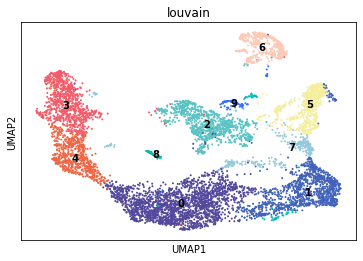

In [28]:
sc.pl.umap(data, color = 'louvain', palette = cluster_colors, legend_loc = 'on data')

... storing 'DF_Classification' as categorical
... storing 'all' as categorical
... storing 'cellIdent' as categorical
... storing 'clustIdent' as categorical
... storing 'hmIdent2' as categorical
... storing 'included' as categorical
... storing 'louvain' as categorical
... storing 'orig.ident' as categorical
... storing 'sampleID' as categorical
... storing 'sub_clusters_ExNeurons_names' as categorical
... storing 'sub_sub_clusters_ExNeurons_names' as categorical
... storing 'sub_subclustering' as categorical
... storing 'subclustering' as categorical


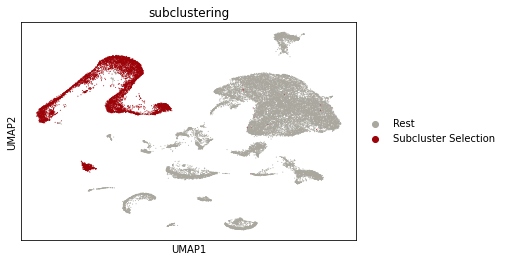

In [6]:
# coloring by what is selected for subclustering
sc.pl.umap(data, color = 'subclustering', 
           palette = ['#A9A79E','#9D0208'] #order is the same as legend (rest, subcluster selection)
          )

In [21]:
sc.pl.umap(data, color = ['Syt1','Slc17a7'], color_map = 'viridis')

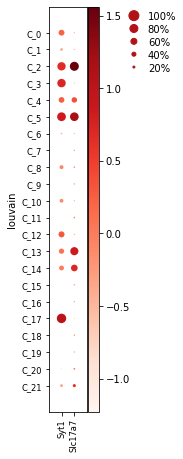

GridSpec(2, 5, height_ratios=[0, 10.5], width_ratios=[0.7, 0, 0.2, 0.5, 0.25])

In [25]:
sc.pl.dotplot(data, ['Syt1','Slc17a7'], groupby='louvain')

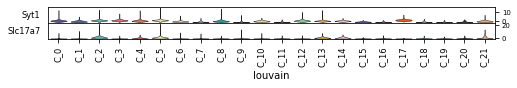

In [20]:
#violin plot colored by cluster (but with genes on vertical axis)
ax = sc.pl.stacked_violin(data, ['Syt1','Slc17a7'], groupby='louvain', palette = cluster_colors, swap_axes=True)